<a href="https://colab.research.google.com/github/Nancytechie/NLP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2025-02-14 08:47:55--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  --.-KB/s    in 0.1s    

2025-02-14 08:47:55 (29.4 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('AirlineTweets.csv', usecols=['airline_sentiment', 'text'])
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

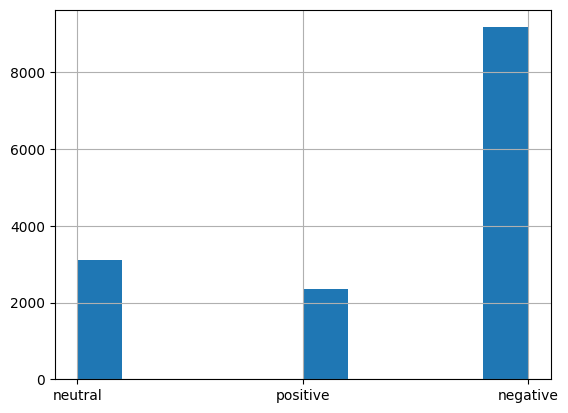

In [8]:
df['airline_sentiment'].hist()

In [9]:
target_map = {'positive' : 1, 'negative': 0, 'neutral' : 2}
df['target'] = df['airline_sentiment'].map(target_map)

In [10]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [11]:
df_train, df_test = train_test_split(df)

In [12]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [13]:
vectorizer = TfidfVectorizer(max_features=2000)

In [14]:
X_train = vectorizer.fit_transform(df_train['text'])

In [15]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157852 stored elements in Compressed Sparse Row format>

In [19]:
X_test = vectorizer.transform(df_test['text'])

In [20]:
Y_train = df_train['target']
Y_test = df_test['target']

In [21]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8551001821493625
Test acc: 0.7978142076502732


In [24]:
Pr_train = model.predict_proba(X_train)#[:, 1]
Pr_test = model.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9427155214535131
Test AUC: 0.8953675693826142


In [23]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [26]:
cm = confusion_matrix(Y_train, P_train, normalize="true")
cm

array([[0.96544214, 0.00827646, 0.0262814 ],
       [0.20022624, 0.69852941, 0.10124434],
       [0.30193548, 0.05075269, 0.64731183]])

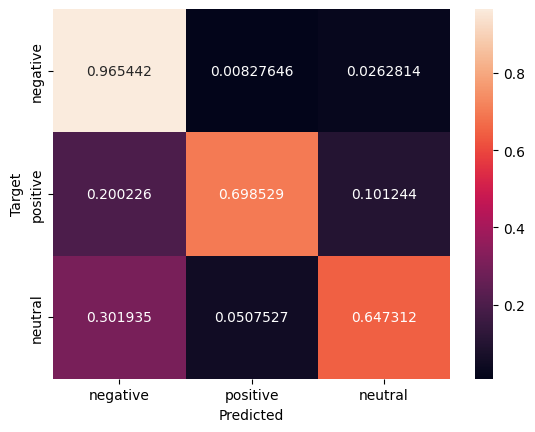

In [27]:
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

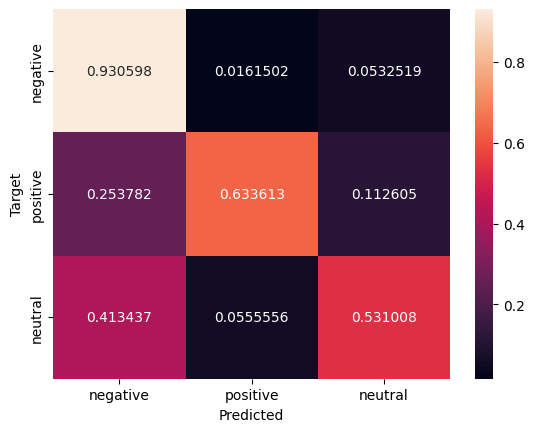

In [29]:
cm_test = confusion_matrix(Y_test, P_test, normalize="true")
plot_cm(cm_test)

In [30]:
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [31]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [32]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [33]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [34]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.9298671288272675
Test acc: 0.9147609147609148


In [35]:
Pr_train = model.predict_proba(X_train)[:, 1]
Pr_test = model.predict_proba(X_test)[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

Train AUC: 0.9788753747469657
Test AUC: 0.9532922029571322


In [36]:
model.coef_

array([[-0.24922949, -0.13419416, -0.34668122, ...,  0.50929767,
         0.00881348, -0.60292764]])

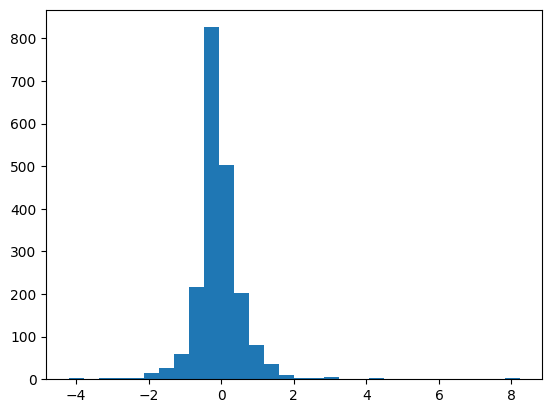

In [37]:
plt.hist(model.coef_[0], bins=30);

In [38]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'united': 1849,
 'change': 338,
 'made': 1087,
 'in': 938,
 'just': 989,
 'over': 1271,
 'hours': 903,
 'for': 745,
 'something': 1619,
 'that': 1737,
 'should': 1575,
 'have': 851,
 'taken': 1711,
 'online': 1246,
 'am': 139,
 'not': 1213,
 'loved': 1076,
 'the': 1739,
 'agent': 112,
 'though': 1755,
 'door': 568,
 'to': 1775,
 'half': 826,
 'into': 964,
 'plane': 1334,
 'seat': 1535,
 'be': 235,
 'forced': 746,
 'always': 138,
 'sit': 1591,
 'here': 873,
 'americanair': 143,
 '11': 6,
 'out': 1266,
 'of': 1227,
 'delayed': 497,
 'flights': 728,
 'you': 1993,
 'suck': 1682,
 'and': 148,
 'getting': 793,
 'worse': 1971,
 'fair': 670,
 'usairways': 1868,
 'stuck': 1677,
 'need': 1191,
 'reflight': 1438,
 'booking': 270,
 'problems': 1380,
 'next': 1199,
 'flight': 717,
 'possibly': 1359,
 'dm': 554,
 'more': 1166,
 'info': 951,
 'southwestair': 1630,
 'got': 810,
 'help': 867,
 'from': 765,
 'nice': 1201,
 'lady': 1007,
 'on': 1241,
 'phone': 1319,
 'thank': 1734,
 'refund': 1439,
 'vo

In [39]:
threshold = 2

print("Most positive words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
southwestair 2.90368741819097
thank 8.099225514793845
great 5.19751500231848
best 3.6153290961527955
virginamerica 3.2486443545540156
thx 2.8164212714727093
jetblue 2.965801385842791
good 3.2279976339766114
thanks 8.222060250722302
love 4.386979170964697
appreciate 2.964099073018773
awesome 4.07888420699413
cool 2.1428392370849743
kudos 2.656282723530661
amazing 4.243634192708097
worries 2.7418057143223904
wonderful 2.1162782091627768


In [40]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
hours -3.1763387533926886
not -4.2078307486479805
delayed -2.719858104285592
hour -2.060519567168619
but -2.2144610667898093
cancelled -2.6628847487506384
nothing -2.111876183913803
what -2.0074049422027693
no -3.938414198906718
worst -3.2120438023534073
hold -2.778832548291992
why -2.2143548103343624
doesn -2.0250932721961434
luggage -2.1903108180765183
